# Rethinking Generalization

This project was inspired by [Understanding Deep Learning Requires Rethinking Generalization](https://arxiv.org/pdf/1611.03530.pdf), by Zhang, et. al. 2016. In short, neural networks are able to achieve high accuracy on most datasets---this includes shuffling the labels or even assigning random labels to an existing dataset. Even worse, high accuracy may be achieved on random datasets, even with regularization. This suggests that we cannot attribute the generalizability of neural networks only to regularization; we should develop further theory to understand the phenomenon of generalizability. Perhaps that will allow us to take a more scientific approach to training future neural networks.

**NOTE:** most of the data generated by this program takes about 30 minutes (5 variations), and one took 2.5hrs. Therefore, as a default, I will not enable those steps, instead just importing saved data. However, if you would like to run the actual program, please set the corresponding cells back to ```code```. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cifar_utils
import learner

In [2]:
# Data properties
X_SHAPE     = [32,32]           # image is 32 x 32 pixels
TRAIN_SIZE  = 50000             # number of training points to use, no more than 50000
NUM_CLASSES = 10                # number of categories
TEST_SIZE   = 10000             # at most 10000 (size of test set)


# Data management options:
REPEAT = True                   # cycle through data for training


# Preprocessing options:
CENTERED  = False               # zero-centers data
RESCALED  = True                # normalized to 1
GRAYSCALE = False               # add grayscale channel
SHAPED    = True                # reshape to [32,32,3]


# Model options:
# conv >> pool >> fc1 >> dropout >> fc2
KERNEL_SIZE = 5                 # convolution kernel has dimension KERNEL_SIZE x KERNEL_SIZE
NUM_FILTERS = 32                # number of convolution filters
POOLING     = 2                 # reduction factor per dimension
FC_FEATURES = 1024              # number of features produced by fc1
KEEP_PROB   = 0.9               # 1 - dropout probatility


# Training options:
LEARNING_RATE   = 1e-3           # SGD learning rate
NUM_EPOCHS      = 5              # number of epochs
BATCH_PER_EPOCH = 100            # number of batches per epoch
BATCH_SIZE      = 100            # size of batch (at most TRAIN_SIZE)
LABEL_SCHEME    = 'original'     # 'original', 'permute', or 'random'
DATA_SCHEME     = 'image'        # 'image' or 'static' NEED TO CHANGE TO STATIC !!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
ACCURACY_SIZE   = 30             # number of points for training accuracy
VALIDATION_SIZE = 30             # number of points for testing accuracy at most TEST_SIZE

In [3]:
# Derived Statistics
# Number of Channels:
if GRAYSCALE:
    CHANNELS=4
else:
    CHANNELS=3
    
# learning problem
default_learning_kwargs = {
    'train_size'      : TRAIN_SIZE,
    'num_classes'     : NUM_CLASSES,
    'batch_per_epoch' : BATCH_PER_EPOCH,
    'batch_size'      : BATCH_SIZE,
    'accuracy_size'   : ACCURACY_SIZE,
    'validation_size' : VALIDATION_SIZE,
    'centered'        : CENTERED,
    'rescaled'        : RESCALED,
    'grayscale'       : GRAYSCALE,
    'shaped'          : SHAPED,
    'repeat'          : REPEAT,
    'label_scheme'    : LABEL_SCHEME,
    'data_scheme'     : DATA_SCHEME
}

# cnn
default_conv_kwargs = {
    'learning_rate' : LEARNING_RATE,
    'x_shape'       : X_SHAPE,
    'kernel_size'   : KERNEL_SIZE,
    'channels'      : CHANNELS,
    'pooling'       : POOLING,
    'filters'       : NUM_FILTERS,
    'fc_feat'       : FC_FEATURES,
    'keep_prob'     : KEEP_PROB,
    'num_classes'   : NUM_CLASSES
}

## Original Labels and Original Data
First, we test out the CNN on the original CIFAR-10 data and label set, to establish a baseline. The following model with return ```batch_accuracy```, ```train_accuracy```, and ```test_accuracy```. The first gives the accuracy the model obtained on the current batch. For the next two, the model is run on two fixed data sets; one contained in the training data, and the other in the validation data.

In [4]:
# Training time: 1671s on GCloud
# data is saved here:
original_batch = np.loadtxt('output_data/original/accuracy_batch_original')
original_train = np.loadtxt('output_data/original/accuracy_train_original')
original_test  = np.loadtxt('output_data/original/accuracy_test_original')

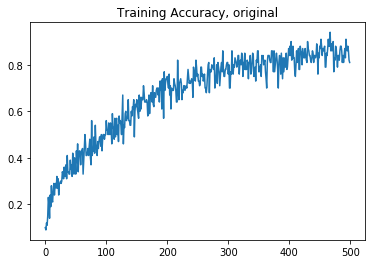

In [5]:
# Plot batch accuracy
plt.plot(original_batch.reshape(-1))
plt.title('Training Accuracy, original')
plt.show()

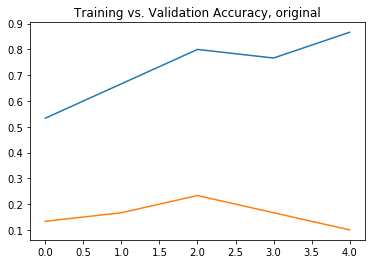

In [6]:
# Plot comparision of training and testing accuracy
plt.plot(original_train)
plt.plot(original_test)
plt.title('Training vs. Validation Accuracy, original')
plt.show()

## Permuted Labels and Original Data
Here, we just shuffle the training data labels, while leaving the test set labels as is.

In [7]:
# Training time: 1677s on GCloud
# data is saved here:
permuted_batch = np.loadtxt('output_data/permuted/accuracy_batch_permuted')
permuted_train = np.loadtxt('output_data/permuted/accuracy_train_permuted')
permuted_test  = np.loadtxt('output_data/permuted/accuracy_test_permuted')

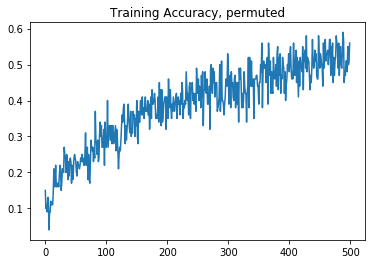

In [8]:
# Plot batch accuracy
plt.plot(permuted_batch.reshape(-1))
plt.title('Training Accuracy, permuted')
plt.show()

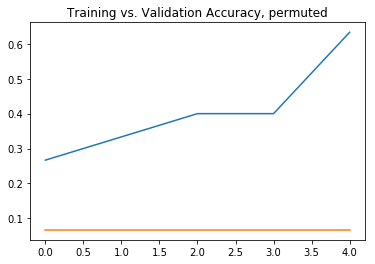

In [9]:
# Plot comparision of training and testing accuracy
plt.plot(permuted_train)
plt.plot(permuted_test)
plt.title('Training vs. Validation Accuracy, permuted')
plt.show()

## Random Labels and Original Data
Here, we generate random labels, uniformly at random.

In [10]:
# Training time: 1666s on GCloud
# data is saved here:
random_batch = np.loadtxt('output_data/random/accuracy_batch_random')
random_train = np.loadtxt('output_data/random/accuracy_train_random')
random_test  = np.loadtxt('output_data/random/accuracy_test_random')

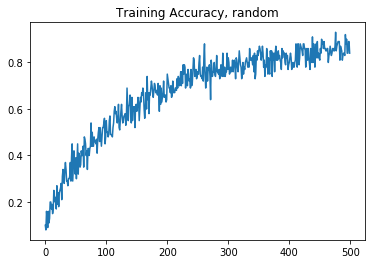

In [11]:
# Plot batch accuracy
plt.plot(random_batch.reshape(-1))
plt.title('Training Accuracy, random')
plt.show()

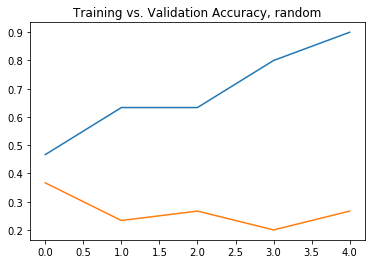

In [12]:
# Plot comparision of training and testing accuracy
plt.plot(random_train)
plt.plot(random_test)
plt.title('Training vs. Validation Accuracy, random')
plt.show()

## Random Image/Static
Here, the image is generated randomly (and so are the labels).

In [13]:
# Training time: 1670s on GCloud
# data is saved here:
static_batch = np.loadtxt('output_data/static/accuracy_batch_static')
static_train = np.loadtxt('output_data/static/accuracy_train_static')
static_test  = np.loadtxt('output_data/static/accuracy_test_static')

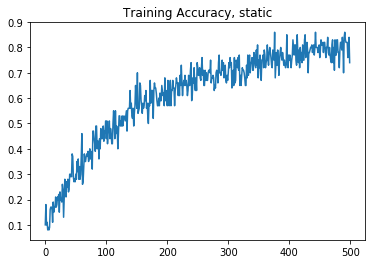

In [14]:
# Plot batch accuracy
plt.plot(static_batch.reshape(-1))
plt.title('Training Accuracy, static')
plt.show()

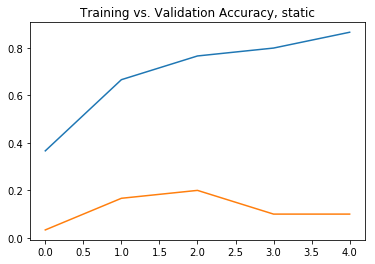

In [15]:
# Plot comparision of training and testing accuracy
plt.plot(static_train)
plt.plot(static_test)
plt.title('Training vs. Validation Accuracy, static')
plt.show()

## Limitations: small training size
Above, we used a training size of 100. Thus, part of the reason we get the massive generalization error is because we must reuse training data. However, it was difficult to get around this given the time/resource constraints. For example, boosting the training size up to 500 led to this:

In [16]:
# Training time: 1691s on GCloud
# data is saved here:
static_500_batch = np.loadtxt('output_data/static_500/accuracy_batch_static_500')
static_500_train = np.loadtxt('output_data/static_500/accuracy_train_static_500')
static_500_test  = np.loadtxt('output_data/static_500/accuracy_test_static_500')

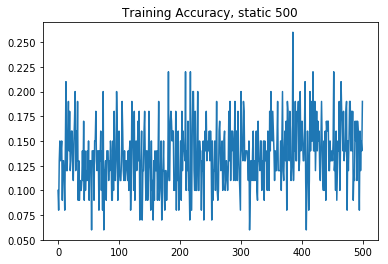

In [17]:
# Plot batch accuracy
plt.plot(static_500_batch.reshape(-1))
plt.title('Training Accuracy, static 500')
plt.show()

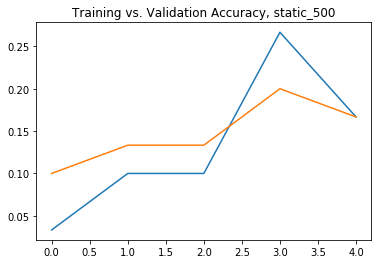

In [18]:
# Plot comparision of training and testing accuracy
plt.plot(static_500_train)
plt.plot(static_500_test)
plt.title('Training vs. Validation Accuracy, static_500')
plt.show()

It required almost 10000s to obtain:

In [19]:
long_batch = np.loadtxt('output_data/long/accuracy_batch_long')
long_train = np.loadtxt('output_data/long/accuracy_train_long')
long_test  = np.loadtxt('output_data/long/accuracy_test_long')

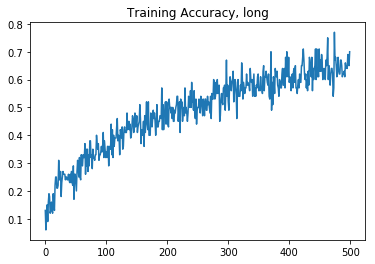

In [20]:
# Plot batch accuracy
plt.plot(long_batch.reshape(-1))
plt.title('Training Accuracy, long')
plt.show()

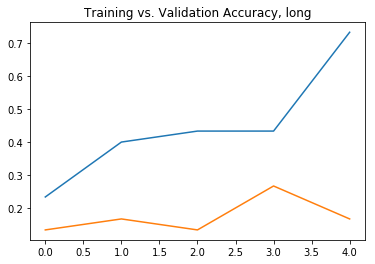

In [21]:
# Plot comparision of training and testing accuracy
plt.plot(long_train)
plt.plot(long_test)
plt.title('Training vs. Validation Accuracy, long')
plt.show()

## Comparison
Now, we can plot the different training curves.

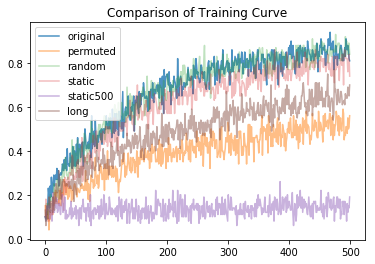

In [22]:
# Plot comparison of training curves
plt.plot(original_batch.reshape(-1), alpha=0.8, label='original')
plt.plot(permuted_batch.reshape(-1), alpha=0.5, label='permuted')
plt.plot(random_batch.reshape(-1), alpha=0.3, label='random')
plt.plot(static_batch.reshape(-1), alpha=0.3, label='static')
plt.plot(static_500_batch.reshape(-1), alpha=0.5, label='static500')
plt.plot(long_batch.reshape(-1), alpha=0.5, label='long')
plt.legend()
plt.title('Comparison of Training Curve')
plt.show()